# RAW VERSION. PLEASE LOOK THROUGH CAREFULLY

In [136]:
'''Importing general libraries:
pandas for dealing with dataframes
numpy is a library for scientific computing
from scipy we need only stats for a linear regression
from statsmodels.api we need sm for a linear regresion as well
seaborn and matplotlib for visualization 
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [137]:
df=pd.read_csv("Train_anonim.csv", error_bad_lines=False)
#rading a .csv file into a pandas dataframe. This should be used to train a model. test.csv should not be used to train a model. 

In [138]:
df.head()
#df is correctly read.

Artikel_pro_min Presse  Artikelnr    Intervall_Ende  Intervall_Anfang  \
0             6.22   P4DO    9131252  30MAR18:18:15:01  30MAR18:18:10:02   
1             5.40   P4DO    9131252  30MAR18:21:00:01  30MAR18:20:55:01   
2             6.20   P4DO    9131252  30MAR18:16:40:02  30MAR18:16:35:02   
3             6.00   P4DO    9131252  31MAR18:00:00:02  30MAR18:23:55:02   
4             6.20   P4DO    9131252  30MAR18:23:20:02  30MAR18:23:15:02   

   unrund  Durchmesser                       Artikel_Bez_text  \
0       0           17  Boutique Alba Fruehst.Untertasse 17cm   
1       0           17  Boutique Alba Fruehst.Untertasse 17cm   
2       0           17  Boutique Alba Fruehst.Untertasse 17cm   
3       0           17  Boutique Alba Fruehst.Untertasse 17cm   
4       0           17  Boutique Alba Fruehst.Untertasse 17cm   

   Durchmesser_Eisenmann  Artikeltyp Artikelkategorie  Hoehe  Ausdehnung  \
0                   16.6        1250             TFL2    2.0  432.848636   
1                   16.6        1250             TFL2    2.0  432.848636   
2                   16.6        1250             TFL2    2.0  432.848636   
3                   16.6        1250             TFL2    2.0  432.848636   
4                   16.6        1250             TFL2    2.0  432.848636   

   Quotient_DM_Hoehe Rohstoff  
0                8.3       FC  
1                8.3       FC  
2                8.3       FC  
3                8.3       FC  
4                8.3       FC

In [139]:
df.columns

Index(['Artikel_pro_min', 'Presse', 'Artikelnr', 'Intervall_Ende',
       'Intervall_Anfang', 'unrund', 'Durchmesser', 'Artikel_Bez_text',
       'Durchmesser_Eisenmann', 'Artikeltyp', 'Artikelkategorie', 'Hoehe',
       'Ausdehnung', 'Quotient_DM_Hoehe', 'Rohstoff'],
      dtype='object')

In [140]:
df.describe()

Artikel_pro_min     Artikelnr        unrund   Durchmesser  \
count     4.344284e+06  4.344284e+06  4.344284e+06  4.344284e+06   
mean      3.374209e+00  1.190325e+07  1.991021e-01  2.400115e+01   
std       1.991998e+00  1.333719e+07  3.993250e-01  5.867581e+00   
min       1.800000e-01  1.425220e+05  0.000000e+00  9.000000e+00   
25%       1.000000e+00  6.738680e+05  0.000000e+00  2.100000e+01   
50%       3.610000e+00  9.502642e+06  0.000000e+00  2.400000e+01   
75%       4.820000e+00  9.672642e+06  0.000000e+00  2.700000e+01   
max       3.520000e+01  4.077161e+07  1.000000e+00  4.300000e+01   

       Durchmesser_Eisenmann    Artikeltyp         Hoehe    Ausdehnung  \
count           4.344284e+06  4.344284e+06  4.344030e+06  4.344030e+06   
mean            2.504994e+01  2.550734e+03  2.994599e+00  1.626608e+03   
std             6.575510e+00  5.252549e+02  1.822344e+00  1.326826e+03   
min             9.500000e+00  1.220000e+03  1.100000e+00  7.797040e+01   
25%             2.130000e+01  2.610000e+03  2.000000e+00  6.927212e+02   
50%             2.440000e+01  2.640000e+03  2.300000e+00  1.326650e+03   
75%             2.830000e+01  2.700000e+03  3.500000e+00  2.093557e+03   
max             4.700000e+01  4.831000e+03  1.300000e+01  1.433509e+04   

       Quotient_DM_Hoehe  
count       4.344030e+06  
mean        9.931587e+00  
std         3.811073e+00  
min         1.800000e+00  
25%         6.800000e+00  
50%         9.800000e+00  
75%         1.290000e+01  
max         2.690000e+01

We should stipulate a discrepancy of measurements. Since for every measurement we have some noise, it makes sense to average on (Artikel_pro_min, ARBEITSPLATZ). This should be EXPLICITLY said. 

In [141]:
''' 
One should first verified, whether such averaging helps. This means comparing variances. 
If a variance withing a group is small comparing to a global variance, such procedure should help.
'''
print("Variance of Responce in a sample", np.var(df["Artikel_pro_min"].values))

Variance of Responce in a sample 3.968056312347467


In [142]:
'''
grouping and applying a group function - np.var
'''
variance_unique=df.groupby(["Artikel_Bez_text", "Presse"])["Artikel_pro_min"].apply(np.var)

In [143]:
'''
Artikel_Bez_text->Artikel_ID, ARBEITSPLATZ->Presse 
'''
print("After groupping according (Artikel_ID, Presse) the variance of Responce is as the following")
variance_unique

After groupping according (Artikel_ID, Presse) the variance of Responce is as the following


Artikel_Bez_text                           Presse
"New Cottage Fruehst.te.o.23x19cm""GEST"   P2NE      0.587622
                                           PH42      0.521613
                                           PH43      0.648610
"New Cottage Fruehst.teller 21cm""GEST"""  P3DO      1.466017
                                           PH43      0.956366
"New Cottage Speiset.o.fl.29x25cm""GEST"   P2NE      0.539204
"New Cottage Speiseteller 27cm ""GEST"""   P3DO      1.767087
                                           PH42      1.471198
                                           PH43      1.339226
                                           PH51      1.232034
                                           PH52      1.542148
"Newave Speiseteller 27cm ""GEST"""        PH61      0.364736
"Royal Fruehst.teller 22cm""GEST"""        P3DO      1.072424
                                           PH42      0.990699
                                           PH43      1.010470
                    

In [144]:
'''
Our responce will be an averaged Product_pro_min - MeanWert. This makes a responce less noisy. This should also be EXPLICITLY said.
'''
print("Mean of Responce after the same grouping")
mean_unique=df.groupby(["Artikel_Bez_text", "Presse"])["Artikel_pro_min"].apply(np.mean)
mean_unique

Mean of Responce after the same grouping


Artikel_Bez_text                           Presse
"New Cottage Fruehst.te.o.23x19cm""GEST"   P2NE      2.877580
                                           PH42      2.243929
                                           PH43      3.067221
"New Cottage Fruehst.teller 21cm""GEST"""  P3DO      5.474100
                                           PH43      5.215453
"New Cottage Speiset.o.fl.29x25cm""GEST"   P2NE      2.679025
"New Cottage Speiseteller 27cm ""GEST"""   P3DO      5.029876
                                           PH42      4.379561
                                           PH43      4.776052
                                           PH51      4.475306
                                           PH52      4.536494
"Newave Speiseteller 27cm ""GEST"""        PH61      1.915875
"Royal Fruehst.teller 22cm""GEST"""        P3DO      4.720492
                                           PH42      4.447861
                                           PH43      4.443260
                    

In [145]:
#Deleting duplicates and other variables that we will not use anymore
cols=list(set(df.columns)-{"Artikel_pro_min", "Intervall_Ende", "Intervall_Anfang"})
df_ohneDup=df[cols].drop_duplicates()

In [146]:
df[cols].head()

Artikel_Bez_text  Artikelnr  Hoehe  \
0  Boutique Alba Fruehst.Untertasse 17cm    9131252    2.0   
1  Boutique Alba Fruehst.Untertasse 17cm    9131252    2.0   
2  Boutique Alba Fruehst.Untertasse 17cm    9131252    2.0   
3  Boutique Alba Fruehst.Untertasse 17cm    9131252    2.0   
4  Boutique Alba Fruehst.Untertasse 17cm    9131252    2.0   

   Durchmesser_Eisenmann  Durchmesser  Quotient_DM_Hoehe  Artikeltyp Rohstoff  \
0                   16.6           17                8.3        1250       FC   
1                   16.6           17                8.3        1250       FC   
2                   16.6           17                8.3        1250       FC   
3                   16.6           17                8.3        1250       FC   
4                   16.6           17                8.3        1250       FC   

   Ausdehnung  unrund Artikelkategorie Presse  
0  432.848636       0             TFL2   P4DO  
1  432.848636       0             TFL2   P4DO  
2  432.848636       0             TFL2   P4DO  
3  432.848636       0             TFL2   P4DO  
4  432.848636       0             TFL2   P4DO

In [147]:
#... and creating a mean-value column
df_ohneDup["MeanWert"]=df_ohneDup.apply(lambda x: mean_unique.loc[(x["Artikel_Bez_text"], x["Presse"])], axis=1)
df_ohneDup.dropna(inplace=True)


#getting Responce
y=df_ohneDup["MeanWert"].values

#Deleting columns Artikel_ID; getting regressors
X=df_ohneDup[list(set(df_ohneDup.columns)-{"Artikel_Bez_text", "Durchmesser_Eisenmann", "MeanWert"})]
X.head()

Artikelnr  Hoehe  Durchmesser  Quotient_DM_Hoehe  Artikeltyp Rohstoff  \
0       9131252    2.0           17                8.3        1250       FC   
755     9131282    2.0           15                7.4        1280       FC   
4845    9131432    1.8           12                6.7        1430       FC   
5817     142522    2.0           19                9.5        2520       FC   
6078     142522    2.0           19                9.5        2520       FC   

      Ausdehnung  unrund Artikelkategorie Presse  
0     432.848636       0             TFL2   P4DO  
755   339.433378       0             TFL2   P4DO  
4845  203.575204       0             TFL1   P4DO  
5817  561.104156       0             TFL2   P3DO  
6078  561.104156       0             TFL2   PH43

In what follows df_ohneDup will be analyzed.

In [148]:
df_ohneDup.shape

(1280, 13)

In [149]:
#separating num_cols and cat_cols
num_cols=['Hoehe', 'Durchmesser', 'Ausdehnung', 'Quotient_DM_Hoehe']
          
cat_cols=['Artikelkategorie','Artikelnr', 'unrund','Artikeltyp', 'Rohstoff', "Presse"]

#coding categorical variables that do not have numerical representation
dic_for_Artikelkategorie={'TFL2': 0 , 'TFL1':1,  'TFL4':2,  'TFL3':3 ,  'TTI1':4, 'TFL5':5, 'SCH2':6, 'TFL6':7, 'TTI2':8, 'SCH3':9,
 'SCH1':10}

dic_for_Masse={"FC":0, "BC": 1}
dic_for_Material={k: value for value, k in enumerate(df["Artikelnr"].unique()) }
dic_for_Presse={key: value for value, key in enumerate(X['Presse'].unique())}


X_cat=X[cat_cols].apply(lambda x: np.array((dic_for_Artikelkategorie[x["Artikelkategorie"]], dic_for_Material[x["Artikelnr"]],dic_for_Masse[x["Rohstoff"]], x["unrund"], x["Artikeltyp"], dic_for_Presse[x["Presse"]])), axis=1) 

In [150]:
#The coded cathegorical variables are as the following
X_cat=np.stack(X_cat.values, axis=0)
X_cat

array([[   0,    0,    0,    0, 1250,    0],
       [   0,    1,    0,    0, 1280,    0],
       [   1,    2,    0,    0, 1430,    0],
       ...,
       [   6,  398,    1,    0, 3180,    9],
       [   6,  398,    1,    0, 3180,   10],
       [   1,  399,    1,    0, 1610,    0]])

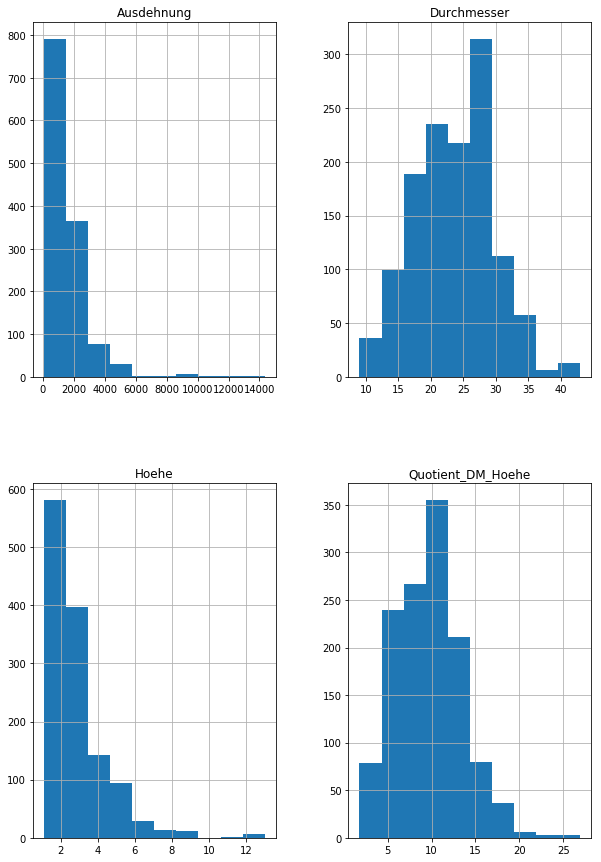

In [151]:
#hystograms for numerical variables
df_ohneDup[num_cols].hist(figsize=(10,15))
plt.show()

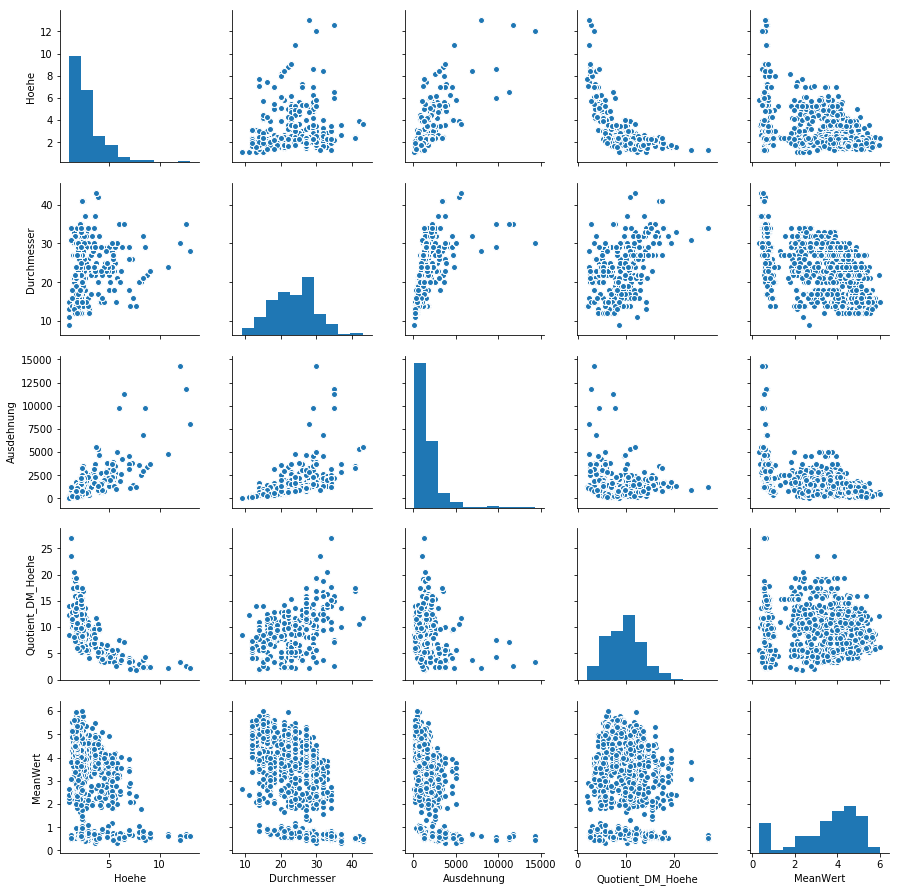

In [152]:
#correlation diagram for num_cols and MeanWert
sns.pairplot(df_ohneDup, vars=num_cols+["MeanWert"], dropna=True)
plt.show()

In [153]:
#numerical columns
X_num=X[num_cols].values

In [154]:
#all regressors
X_reg=np.concatenate([X_num, X_cat], axis=1)

In [155]:
X_reg.shape

(1280, 10)

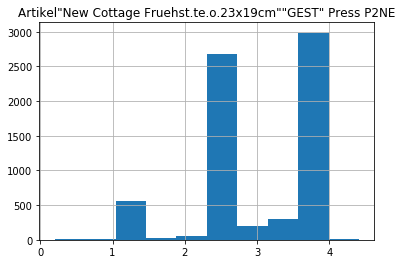

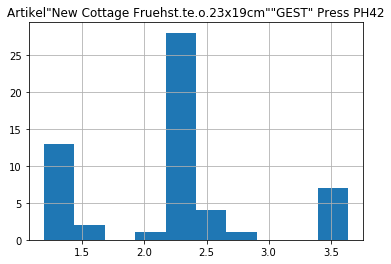

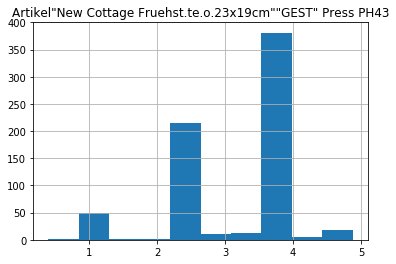

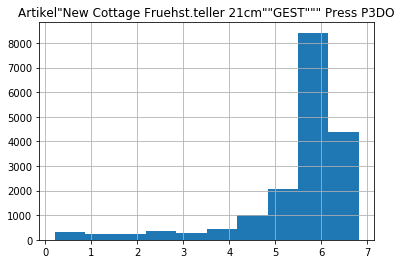

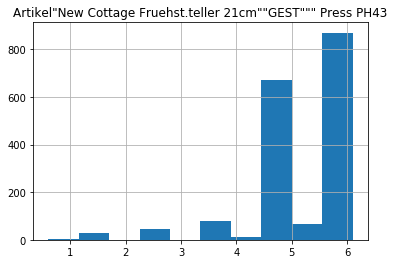

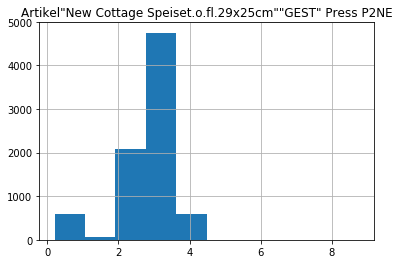

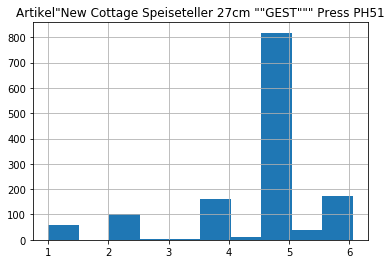

In [156]:
'''Understanding data before applying ML'''
#Looking at responce distribution for different groups: Product_ID, Presse
# stop ist fürs Testing
stop=0
for k,v in mean_unique.index:
    plt.title("Artikel"+k+" "+ "Press "+ v)
    #print("Artikel"+k+" "+ "Press "+ v)
    df[(df["Artikel_Bez_text"]==k) & (df["Presse"]==v)]["Artikel_pro_min"].hist()
    plt.show()
    stop+=1
    if stop>10:
        break

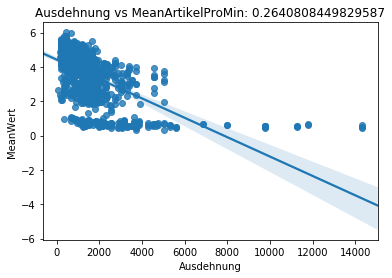

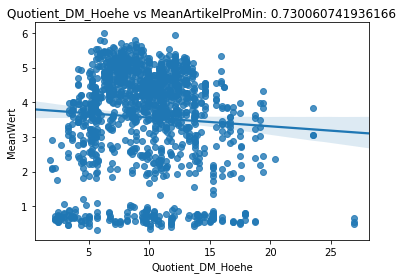

In [157]:
#Trying to do 1-dim linear regression
for col in num_cols:
    result = sm.OLS(y, df_ohneDup[col]).fit()
    
    plt.title(str(col)+" vs "+"MeanArtikelProMin: "+str(result.rsquared))
    sns.regplot(x=col, y="MeanWert", data=df_ohneDup)
    plt.show()

In [158]:
X_reg.shape[1]

10

In [159]:
''' What numerical variables are important for a prediction of y'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

Criteria_to_Select=SelectKBest(score_func=f_regression, k=3)
Criteria_to_Select.fit(X_num,y)

scores=-np.log10(Criteria_to_Select.pvalues_)
plt.bar(range(X_num.shape[1]), scores)
plt.xticks(range(X_num.shape[1]), list(df_ohneDup[num_cols].columns), rotation="vertical" )
plt.show()

In [160]:
for name, choose in zip(X.columns, Criteria_to_Select.get_support()):
    if choose:
        print("The {name} shoud be selected.".format(name=name))

The Artikelnr shoud be selected.
The Hoehe shoud be selected.
The Durchmesser shoud be selected.


In [161]:
#Verifying correlations which is equivalent to the above
df_ohneDup[num_cols].corrwith(df_ohneDup["MeanWert"])

Hoehe               -0.433949
Durchmesser         -0.521873
Ausdehnung          -0.574697
Quotient_DM_Hoehe   -0.065115
dtype: float64

In [162]:
X_cat

array([[   0,    0,    0,    0, 1250,    0],
       [   0,    1,    0,    0, 1280,    0],
       [   1,    2,    0,    0, 1430,    0],
       ...,
       [   6,  398,    1,    0, 3180,    9],
       [   6,  398,    1,    0, 3180,   10],
       [   1,  399,    1,    0, 1610,    0]])

In [163]:

'''
Training a random forest, using GridSearchCv to find an optimal set of hyperparameters

'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit,  GridSearchCV

#defining cross validation strategy, 5 times cross validation, every time test_size is 30%
cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)


parameters = {'max_features': [ 5, 6, 7,8,9,10], 'min_samples_leaf': [3, 5, 7,9], 'max_depth': [5,10,15,20,30,50]}

#random forest contains 100 trees.
rfr = RandomForestRegressor(n_estimators=100, random_state=42, 
                             n_jobs=-1)

gcv_forest = GridSearchCV(rfr, parameters, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv_shuffle, verbose=1)
gcv_forest.fit(X_reg, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.7min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5, 10, 15, 20, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [164]:
print("The best regression model has MSE {mse}".format(mse=-gcv_forest.best_score_))

The best regression model has MSE 0.22086252188321773


In [165]:
regressor=gcv_forest.best_estimator_
regressor


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Text(0.5,1,'Predicted VS True Values')

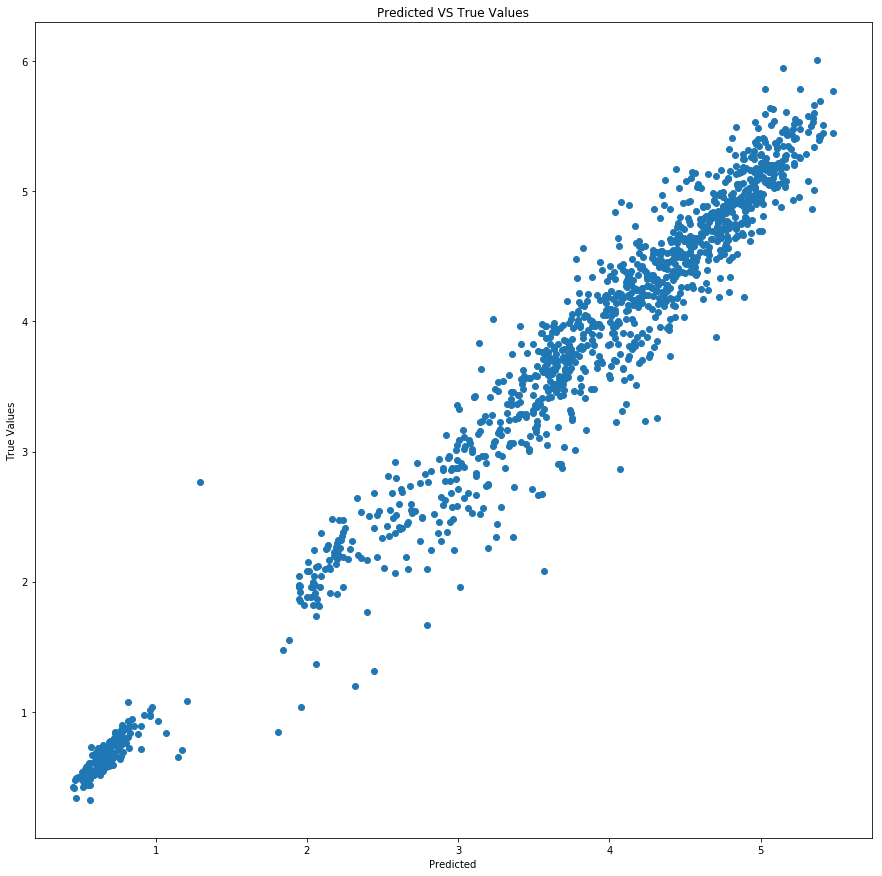

In [166]:
'''Visualizing the results'''
plt.figure(figsize=(15,15))
plt.scatter(regressor.predict(X_reg),y)
plt.xlabel("Predicted")
plt.ylabel("True Values")
plt.title("Predicted VS True Values", loc="center")

In [167]:
'''Multiple regression'''
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
#Apply one-hot encoding for categorical variables and scaling for numerical variables
enc = OneHotEncoder(handle_unknown='ignore')
X_cat1 = X_cat.copy()
enc.fit_transform(X_cat1)

scaler = StandardScaler()
scaler.fit(X_num)
X_num_scaled=scaler.transform(X_num)


In [168]:
X_new=np.concatenate([X_num_scaled, X_cat1], axis=1)

In [169]:
from sklearn.linear_model import LinearRegression

lin_regr=LinearRegression(fit_intercept=False,n_jobs=-1)

print("MSE Error of LinearRegression is {mse}".format(mse=abs(cross_val_score(lin_regr, X_new, y, cv=5, scoring='neg_mean_squared_error').mean())))

MSE Error of LinearRegression is 1.5896593098006502


Text(0.5,1,'Predicted VS True Values')

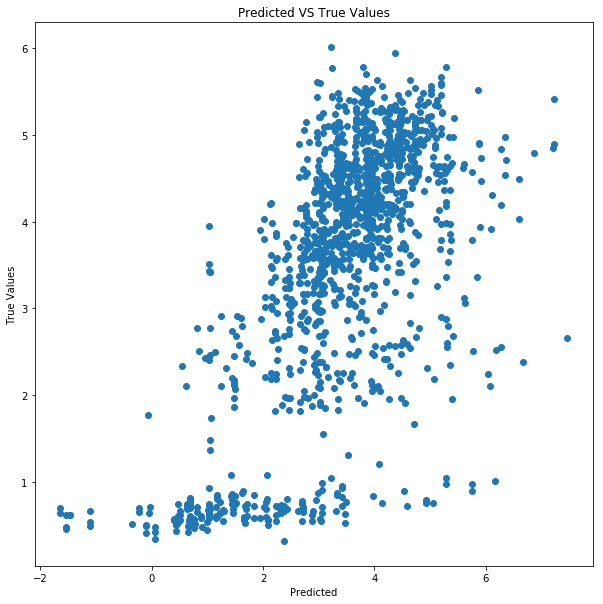

In [170]:
'''Visualizing the results'''

lin_regr.fit(X_new,y)
plt.figure(figsize=(10,10))
plt.scatter(lin_regr.predict(X_new),y)
plt.xlabel("Predicted")
plt.ylabel("True Values")
plt.title("Predicted VS True Values", loc="center")

In [171]:
print("The coefficients of the linear regression are {coef}".format(coef=lin_regr.coef_))

The coefficients of the linear regression are [-1.39960999e+00 -4.78035851e-01  3.79442691e-01 -6.53768308e-01
  1.28220144e-03  4.07397271e-03 -5.37587632e-01 -2.30085544e+00
  1.19587972e-03 -4.27396935e-03]


In [172]:
#Trying RidgeRegression and LassoRegression with CV to find an optimal regularization parameter
from sklearn.linear_model import Lasso, Ridge



In [173]:
param={"alpha":[0.01,0.02,0.1,0.5,1,1.5,2,2.5, 5, 10, 15,20,25]}
RidgeRegr=Ridge()

cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

gcv = GridSearchCV(RidgeRegr, param, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv_shuffle, verbose=1)
gcv.fit(X_new, y)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    6.9s finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.01, 0.02, 0.1, 0.5, 1, 1.5, 2, 2.5, 5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [174]:
print("MSE for RidgeRegression is {mse}".format(mse=abs(gcv.best_score_)))

MSE for RidgeRegression is 0.7859954886974795


Text(0.5,1,'Predicted VS True Values')

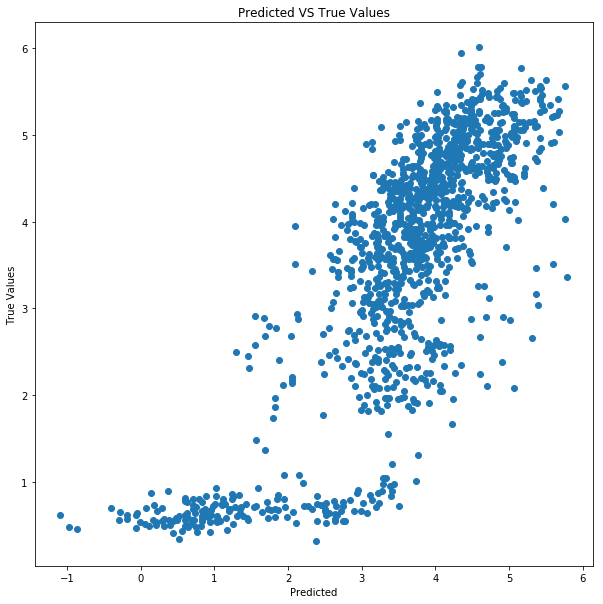

In [175]:
plt.figure(figsize=(10,10))
plt.scatter(gcv.best_estimator_.predict(X_new),y)
plt.xlabel("Predicted")
plt.ylabel("True Values")
plt.title("Predicted VS True Values", loc="center")

In [176]:
print("The coefficients of Ridge Regression Model are {coef}".format(coef=gcv.best_estimator_.coef_))

The coefficients of Ridge Regression Model are [-7.39613579e-01 -2.61324330e-01  2.10519508e-01 -3.44830517e-01
 -2.69456215e-02  6.07843772e-04 -2.30949709e-01 -1.78200561e+00
 -1.60360377e-04 -1.16185094e-01]


In [177]:
param={"alpha":[0.01,0.02,0.1,0.5,1,1.5,2,2.5, 5, 10, 15,20,25]}
LassoRegr=Lasso()

cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

gcv_lasso = GridSearchCV(LassoRegr, param, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv_shuffle, verbose=1)
gcv_lasso.fit(X_new, y)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    6.6s finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.01, 0.02, 0.1, 0.5, 1, 1.5, 2, 2.5, 5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [178]:
print('MSE for Lasso {mse}'.format(mse=abs(gcv_lasso.best_score_)))

MSE for Lasso 0.7841148585464565


Text(0.5,1,'Predicted VS True Values')

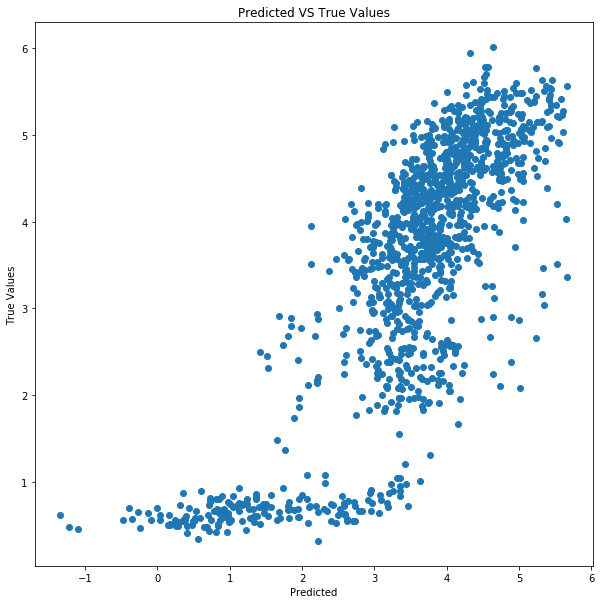

In [179]:
plt.figure(figsize=(10,10))
plt.scatter(gcv_lasso.best_estimator_.predict(X_new),y)
plt.xlabel("Predicted")
plt.ylabel("True Values")
plt.title("Predicted VS True Values", loc="center")

In [180]:
print("The coefficients of Lasso Regression Model are {coef}".format(coef=gcv_lasso.best_estimator_.coef_))

The coefficients of Lasso Regression Model are [-5.71607411e-01 -2.31249772e-01  7.29654369e-02 -2.83238502e-01
 -3.82202940e-02  3.28447450e-04 -1.49985231e-01 -1.62734768e+00
 -1.76890362e-04 -1.20529254e-01]


Note that a 2 coeficients are almost zero.

# Summary
We have seen, that random forest the best model in our case is. We will use it hence on the test.

## Testing

In [181]:
df_test=pd.read_csv("Test_anonim.csv")

In [182]:
df_test.head()

Artikeltyp  Artikelnr  Durchmesser_Eisenmann   Ausdehnung  unrund  \
0        1460     541462                   13.0   238.918121       0   
1        1460     721462                   13.6   246.954315       0   
2        2610     722612                   28.7  1617.311533       0   
3        2621    9142623                   27.3  1463.373493       0   
4        2620    9402622                   26.3   814.878083       0   

                     Artikel_Bez_text ARBEISTPLATZ Rohstoff Artikelkategorie  \
0                Easy Untertasse 13cm         PH51       FC             TFL1   
1             Welcome Untertasse 13cm         PH51       FC             TFL1   
2         Welcome Teller flach 28,5cm         PH52       FC             TFL4   
3  Artesano HP Speisetel.28cm  (GEST)         PH43       FC             TFL4   
4       Voice Basic Speiseteller 27cm         P2NE       FC             TFL4   

   Quotient_DM_Hoehe Presse  Durchmesser  Hoehe  MeanWert  
0                7.2   PH51           13    1.8  4.925827  
1                8.0   PH51           13    1.7  5.364304  
2               11.5   PH52           28    2.5  2.547477  
3               10.9   PH43           28    2.5  4.276529  
4               17.5   P2NE           27    1.5  3.929381

In [183]:
y_test=df_test["MeanWert"].values

In [184]:
X_test_num=df_test[num_cols].values
X_test_num

array([[1.80000000e+00, 1.30000000e+01, 2.38918121e+02, 7.20000000e+00],
       [1.70000000e+00, 1.30000000e+01, 2.46954315e+02, 8.00000000e+00],
       [2.50000000e+00, 2.80000000e+01, 1.61731153e+03, 1.15000000e+01],
       [2.50000000e+00, 2.80000000e+01, 1.46337349e+03, 1.09000000e+01],
       [1.50000000e+00, 2.70000000e+01, 8.14878083e+02, 1.75000000e+01]])

In [188]:
X_test_cat=df_test[cat_cols].apply(lambda x: np.array((dic_for_Artikelkategorie[x["Artikelkategorie"]], dic_for_Material[x["Artikelnr"]],dic_for_Masse[x["Rohstoff"]], x["unrund"], x["Artikeltyp"], dic_for_Presse[x["Presse"]])), axis=1) 

In [189]:
X_test_cat=np.stack(X_test_cat.values, axis=0)
X_test_cat

array([[   1,   84,    0,    0, 1460,    7],
       [   1,  136,    0,    0, 1460,    7],
       [   2,  139,    0,    0, 2610,    5],
       [   2,  154,    0,    0, 2621,    2],
       [   2,  273,    0,    0, 2620,    6]])

In [190]:
X_reg_test=X_reg=np.concatenate([X_test_num, X_test_cat], axis=1)

In [191]:
#predicted responce on our test-data
y_predicted=regressor.predict(X_reg_test)

In [192]:
y_predicted

array([4.64404739, 4.82807193, 3.52850006, 4.52896755, 3.48404228])

In [193]:
#true values
y_test

array([4.92582691, 5.36430435, 2.54747664, 4.27652928, 3.92938112])

In [194]:
#mse of y_predicted vs y_test
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predicted)

0.31828072564387994